## Neural Network perspective and terminoloy

In [1]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Activation
from tensorflow.keras.datasets import boston_housing
from tensorflow.keras import layers
import warnings 
warnings.filterwarnings('ignore')
 
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
SEED_VALUE = 42
np.random.seed(SEED_VALUE)
tf.random.set_seed(SEED_VALUE)

In [3]:
(X_train, y_train), (X_test, y_test) = boston_housing.load_data()
 
print(X_train.shape)
print("\n")
print("Input features: ", X_train[0])
print("\n")
print("Output target: ", y_train[0])

(404, 13)


Input features:  [  1.23247   0.        8.14      0.        0.538     6.142    91.7
   3.9769    4.      307.       21.      396.9      18.72   ]


Output target:  15.2


In [4]:
boston_features = {
    'Average Number of Rooms':5,
}
 
X_train_1d = X_train[:, boston_features['Average Number of Rooms']]
print(X_train_1d.shape)
 
X_test_1d = X_test[:, boston_features['Average Number of Rooms']]


(404,)


In [5]:
model = Sequential()
model.add(Dense(units=1, input_shape=(1,)))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

In [10]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=.005),loss='mse')

In [12]:
history = model.fit(X_train_1d, 
                    y_train, 
                    batch_size=16, 
                    epochs=5, 
                    validation_split=0.3)

Epoch 1/5
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 49.7955 - val_loss: 77.5773
Epoch 2/5
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 49.7883 - val_loss: 77.5654
Epoch 3/5
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 49.7812 - val_loss: 77.5534
Epoch 4/5
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 49.7741 - val_loss: 77.5415
Epoch 5/5
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 49.7670 - val_loss: 77.5296


In [15]:
def plot_loss(history):
    plt.figure(figsize=(20,5))
    plt.plot(history.history['loss'], 'g', label='Training Loss')
    plt.plot(history.history['val_loss'], 'b', label='Validation Loss')
    plt.xlim([0, 100])
    plt.ylim([0, 300])
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

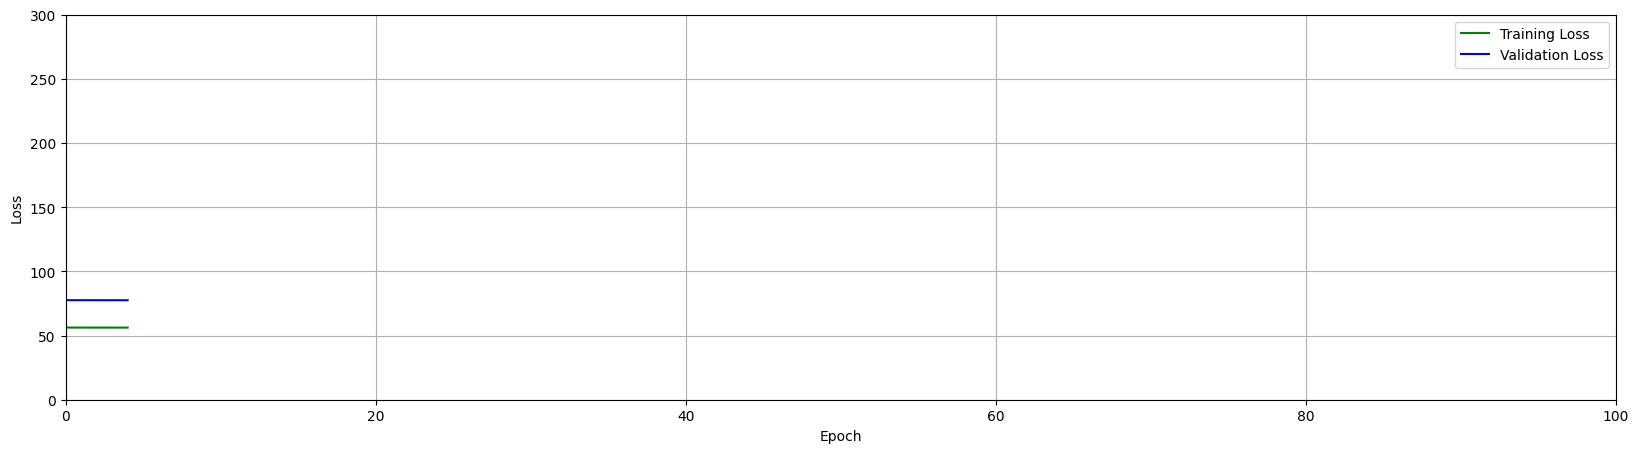

In [16]:
plot_loss(history)

## Make prediction using the model

In [19]:
x = [3, 4, 5, 6, 7]
x = np.array([3, 4, 5, 6, 7]).reshape(-1, 1)  
y_pred = model.predict(x)
for idx in range(len(x)):
    print("Predicted price of a home with {} rooms: ${}K".format(x[idx], int(y_pred[idx]*10)/10))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
Predicted price of a home with [3] rooms: $12.4K
Predicted price of a home with [4] rooms: $15.4K
Predicted price of a home with [5] rooms: $18.4K
Predicted price of a home with [6] rooms: $21.4K
Predicted price of a home with [7] rooms: $24.4K


## plot the model and the data

In [21]:
x = tf.linspace(3,9,10)
y = model.predict(x)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


In [22]:
def plot_data(x_data, y_data, x, y, title=None):
     
    plt.figure(figsize=(15,5))
    plt.scatter(x_data, y_data, label='Ground Truth', color='green', alpha=0.5)
    plt.plot(x, y, color='k', label='Model Predictions')
    plt.xlim([3,9])
    plt.ylim([0,60])
    plt.xlabel('Average Number of Rooms')
    plt.ylabel('Price [$K]')
    plt.title(title)
    plt.grid(True)
    plt.legend()

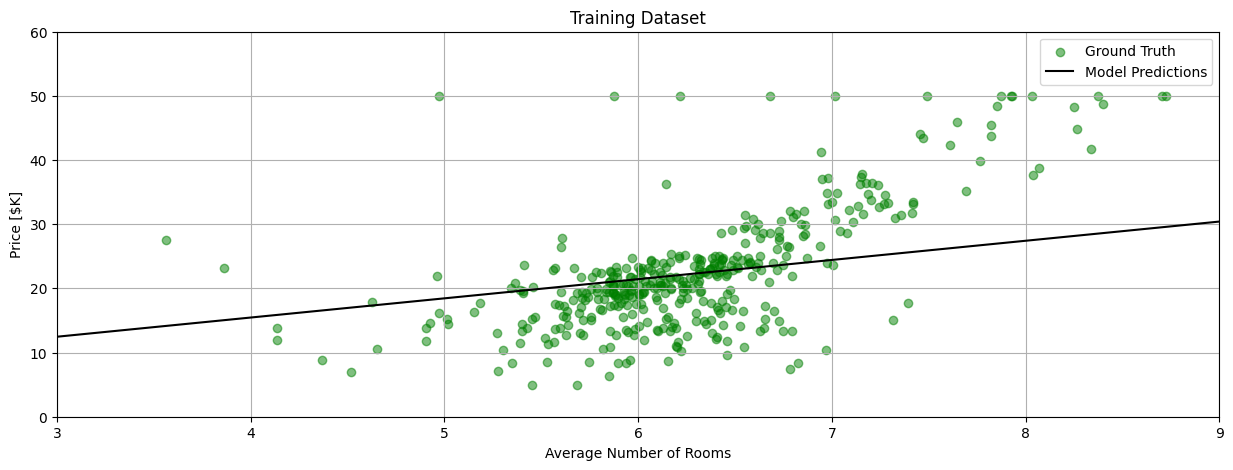

In [23]:
plot_data(X_train_1d, y_train,x, y,title='Training Dataset')

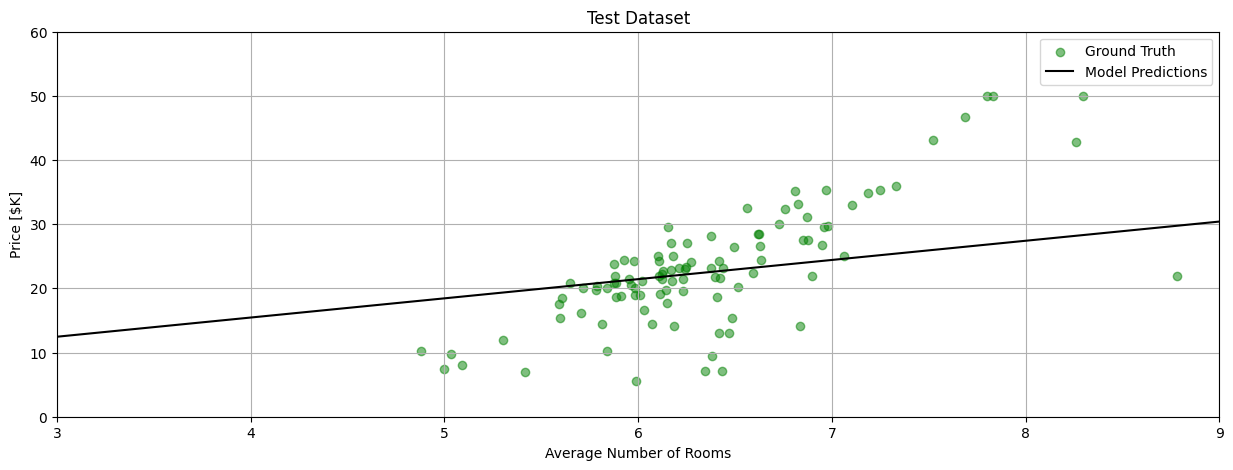

In [24]:
plot_data(X_test_1d, y_test, x, y, title='Test Dataset')